# Libraries

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

# Parameters 

In [70]:
xi = complex(0,1)

# X Y grid

In [71]:
x_min = -2; # minimum value of x
x_max = 2; # maximum value of x
x_range = x_max - x_min; # range of x
dx = 0.2; # step size along x axis
lx = int(x_range/dx)+1 # no. of points along x axis


x = np.linspace(x_min, x_max, lx)  # this will generate a vector containg x values from x_min to x_max
y = np.linspace(x_min, x_max, lx) # this will generate a vector containg y values from y_min to y_max

# full coorindate arrays
xx, yy = np.meshgrid(x, y) # this will create a 2D matrix containing the coordinates (x,y)

XY = np.column_stack((xx.ravel(), yy.ravel()))



# Functions

In [72]:
# ****************************************************************************************************
#            Function for finding the orientation and ellipticity of the polarization ellipses
# ****************************************************************************************************
def field(x,y,l_r,l_l):
    z = 0.0;
    w_0 = 0.006;                 # Beam waist
    wavelength = 780e-7;
    k_0 = 2*np.pi/wavelength;    # Wavenumber of light
    z_R = k_0*w_0**2/2.0;        # Calculate the Rayleigh range
    theta = np.pi/4; beta = 0.0;
    g_r = 1.0; g_l = 1.0;
    r = np.sqrt(x**2 + y**2)*w_0;
    phi = np.arctan2(y, x);
    w_z = w_0*np.sqrt(1.0 + z**2/z_R**2);
    eta_z = np.arctan2(z,z_R);

#  ======================================================
    LG_l0_l = (r*np.sqrt(2.0)/w_z)**abs(l_l)*np.exp(xi*l_l*phi)*np.exp(-(r/w_z)**2)*np.exp(xi*k_0*r**2*z/(2*(z**2 + z_R**2)))*np.exp(-xi*(abs(l_l) + 1.0)*eta_z)*(1.0/np.sqrt(1+(z/z_R)**2));
    LG_l0_r = (r*np.sqrt(2.0)/w_z)**abs(l_r)*np.exp(xi*l_r*phi)*np.exp(-(r/w_z)**2)*np.exp(xi*k_0*r**2*z/(2*(z**2 + z_R**2)))*np.exp(-xi*(abs(l_r) + 1.0)*eta_z)*(1.0/np.sqrt(1+(z/z_R)**2));

#  Right and left circularly polarised component of light
# ======================================================
    E_r = g_r*np.sin(theta)*LG_l0_r*np.exp(xi*beta)
    E_l = g_l*np.cos(theta)*LG_l0_l
    
# x and y component of Electric field
    E_x = (E_r + E_l)/np.sqrt(2.0)
    E_y = -(E_r - E_l)*xi/np.sqrt(2.0)     
    
    return [E_x, E_y, E_r,E_l]
# ######################################################################################################

# ****************************************************************************************************
#           Function for finding the orientation and ellipticity of the polarization ellipses
# ****************************************************************************************************
def ellipses(E_x, E_y):   
#  stokes parameters
    s_0 = np.abs(E_x)**2 + np.abs(E_y)**2    # I
    s_1 = np.abs(E_x)**2 - np.abs(E_y)**2    # Q
    s_2 = 2.0*np.real(np.conjugate(E_x)*E_y) # U
    s_3 = 2.0*np.imag(np.conjugate(E_x)*E_y) # V
    
# orientation
    zai = 0.5*np.arctan2(s_2,s_1)

# ellipticity
    chi = 0.5*np.arcsin(s_3/s_0)
    return [zai, chi]
# ######################################################################################################

# Data for plotting

In [73]:
E_x, E_y, E_r, E_l = field(xx, yy, 1, 0)

s_3 = np.abs(E_r.ravel())**2 - np.abs(E_l.ravel())**2	# s_3 in circular polarization basis

#  intensity of the field
E = np.abs(E_x)**2 + np.abs(E_y)**2

zai,chi = ellipses(E_x, E_y)

chi_flattened = chi.ravel()
zai_flattened = zai.ravel()


# plot: Polarization distribution

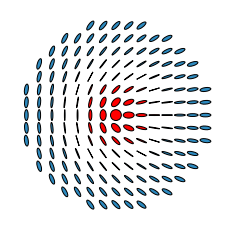

In [74]:
fig, axes = plt.subplots(subplot_kw={'aspect': 'equal'})

for i in range(lx*lx):
    ellipse = Ellipse(XY[i], 0.17, 0.17*np.tan(chi_flattened[i]),180*zai_flattened[i]/np.pi)
    axes.add_artist(ellipse)
    ellipse.set_alpha(1)             # alpha ranges from 0 to 1. It sets the transparency value

    if s_3[i]>0 and np.sqrt(XY[i][0]**2 + XY[i][1]**2) < 1.5 :
        ellipse.set_facecolor('#2E8BC0')   # represents right circular polarization
        ellipse.set_edgecolor('black')
    elif s_3[i]<0 and np.sqrt(XY[i][0]**2 + XY[i][1]**2) < 1.5:
        ellipse.set_facecolor('red')    # represents left circular polarization
        ellipse.set_edgecolor('black')
    elif zai_flattened[i]>-6 and zai_flattened[i]<6 and np.sqrt(XY[i][0]**2 + XY[i][1]**2) < 1.5:
        ellipse.set_facecolor('blue')    # represents left circular polarization
        ellipse.set_edgecolor('black')
    else:
        ellipse.set_facecolor('none')
        ellipse.set_edgecolor('none')


# axis range
axes.set_xlim(-1.7, 1.7)
axes.set_ylim(-1.7, 1.7)
        
# axis labels
axes.xaxis.set_visible(False)
axes.yaxis.set_visible(False)

# axis themselves
axes.axis('off')

# axis ticks
axes.xaxis.set_ticks([])
axes.yaxis.set_ticks([])

# frame of the plot
fig.patch.set_visible(False)

# save the plot to a file
#plt.savefig('Lemon_streamlines_and_VB.png',  dpi=500, transparent = False, bbox_inches='tight') # bbox_inches = 'tight' prevents axis label clipping while saving the file
plt.savefig('ellipses_of_lemon_VB.eps', format='eps', dpi=50, transparent = True)
plt.savefig('ellipses_of_lemon_VB.png', transparent = True, format='png', dpi=300, bbox_inches='tight')

# display plot
plt.show()


# plot: Polarization and intensity distribution

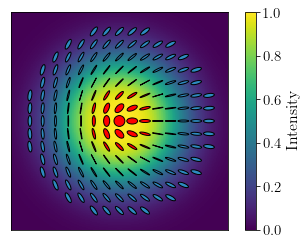

In [75]:
# Enable latex fonts
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]})

font = {'family': "Times New Roman",
        'color':  "black",
        'weight': "normal",
        'size': 17,
        }


fig, axes = plt.subplots(subplot_kw={'aspect': 'equal'})

# polarization distribution
######################################

for i in range(lx*lx):
    ellipse = Ellipse(XY[i], 0.17, 0.17*np.tan(chi_flattened[i]),180*zai_flattened[i]/np.pi)
    axes.add_artist(ellipse)
    ellipse.set_alpha(1)             # alpha ranges from 0 to 1. It sets the transparency value

    if s_3[i]>0 and np.sqrt(XY[i][0]**2 + XY[i][1]**2) < 1.5 :
        ellipse.set_facecolor('#2E8BC0')   # represents right circular polarization
        ellipse.set_edgecolor('black')
    elif s_3[i]<0 and np.sqrt(XY[i][0]**2 + XY[i][1]**2) < 1.5:
        ellipse.set_facecolor('red')    # represents left circular polarization
        ellipse.set_edgecolor('black')
    elif zai_flattened[i]>-6 and zai_flattened[i]<6 and np.sqrt(XY[i][0]**2 + XY[i][1]**2) < 1.5:
        ellipse.set_facecolor('blue')    # represents left circular polarization
        ellipse.set_edgecolor('black')
    else:
        ellipse.set_facecolor('none')
        ellipse.set_edgecolor('none')


# Intensity distribution
######################################
x_min = -2; # minimum value of x
x_max = 2; # maximum value of x
x_range = x_max - x_min; # range of x
dx = 0.01; # step size along x axis
lx = int(x_range/dx)+1 # no. of points along x axis


x = np.linspace(x_min, x_max, lx)  # this will generate a vector containg x values from x_min to x_max
y = np.linspace(x_min, x_max, lx) # this will generate a vector containg y values from y_min to y_max

# full coorindate arrays
xx, yy = np.meshgrid(x, y) # this will create a 2D matrix containing the coordinates (x,y)

E_x, E_y, E_r, E_l = field(xx, yy, 1, 0)

#  intensity of the field
E = np.abs(E_x)**2 + np.abs(E_y)**2

ax = plt.pcolormesh(xx, yy, E/np.max(E), cmap ='viridis', vmin = 0, vmax = 1, shading ='auto')

cbar = plt.colorbar(ax)
cbar.set_label('Intensity', fontsize=16)             # label on the colour bar
cbar.ax.tick_params(labelsize=15)  

#plt.ylim(-2, 2)
#plt.xlim(-2,2)
        
# axis range
axes.set_xlim(-1.7, 1.7)
axes.set_ylim(-1.7, 1.7)
        
# axis labels
axes.xaxis.set_visible(False)
axes.yaxis.set_visible(False)

# axis ticks
axes.xaxis.set_ticks([])
axes.yaxis.set_ticks([])




# # x and y axis labels
# plt.xlabel('$x/w_0$', fontdict=font)
# plt.ylabel('$y/w_0$',fontdict=font)

# # x and y tics font and font size
# plt.xticks(fontsize=15,fontname='Times New Roman')
# plt.yticks(fontsize=15,fontname='Times New Roman')

# save the plot to a file
#plt.savefig('Lemon_streamlines_and_VB.png',  dpi=500, transparent = False, bbox_inches='tight') # bbox_inches = 'tight' prevents axis label clipping while saving the file
plt.savefig('lemon_VB.eps', format='eps', dpi=50,  transparent = True)
plt.savefig('lemon_VB.png', transparent = True, format='png', dpi=300, bbox_inches='tight')


# display plot
plt.show()